### ---------------------------------------------------------------------------------------------------------------------------------------------

### Projeto de análise de dados - NBA (temporada 16/17)


### ---------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
#Importando bibliotecas principais que serão utilizadas no projeto

import pandas as pd
import numpy as np
df_original = pd.read_csv('nba_2016_2017_100.csv')

df_limpo = df_original.drop(columns = ['PLAYER_ID','WIKIPEDIA_HANDLE','ACTIVE_TWITTER_LAST_YEAR','TWITTER_HANDLE','TWITTER_FOLLOWER_COUNT_MILLIONS'])



In [20]:
# Salvando o arquivo csv modificado em um novo arquivo csv

df_limpo.to_csv('limpo_nba_2016_2017_100.csv', index =  False)

In [21]:
# Abrindo novo arquivo salvo
# df_2 vai ser o novo arquivo de controle. Sempre que for necessário resetar o dataset será utilizado esse dataframe

df_2 = pd.read_csv('limpo_nba_2016_2017_100.csv')



### ---------------------------------------------------------------------------------------------------------------------------------------------

### [PERGUNTA 1] Quais são os jogadores mais bem pagos?



In [22]:
# Determinar os 10 jogadores mais bem pagos.
# Quadro comparativo com os 10 jogadores mais bem pagos ( jogadores, abreviacao times, idades, salarios )
df_remuneracao = df_2.sort_values(['SALARY_MILLIONS'], ascending = False).reindex(columns = ['PLAYER_NAME','TEAM_ABBREVIATION','AGE','SALARY_MILLIONS'])
df_remuneracao.reset_index(drop = True, inplace = True)
df_remuneracao.head(10)



,PLAYER_NAME,TEAM_ABBREVIATION,AGE,SALARY_MILLIONS
0,LeBron James,CLE,32,30.96
1,Russell Westbrook,OKC,28,26.54
2,Mike Conley,MEM,29,26.54
3,Al Horford,BOS,31,26.54
4,Kevin Durant,GSW,28,26.54
5,DeMar DeRozan,TOR,27,26.54
6,James Harden,HOU,27,26.50
7,Dirk Nowitzki,DAL,39,25.00
8,Carmelo Anthony,NYK,33,24.56
9,Damian Lillard,POR,26,24.33


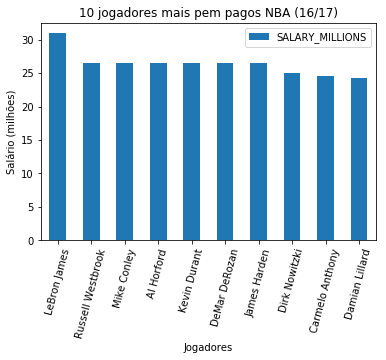

In [23]:
import matplotlib.pyplot as plt #importando biblioteca para para desenvolver gráficos 

grafico_nome_remuneracao = df_remuneracao.head(10).plot(x='PLAYER_NAME', y='SALARY_MILLIONS', kind='bar')
plt.xlabel('Jogadores')
plt.ylabel('Salário (milhões)')
plt.title('10 jogadores mais pem pagos NBA (16/17)')
plt.xticks(rotation = 75)
plt.show()

In [24]:
# Top 10 jogadores com maiores salários
df_remuneracao_top10 = df_remuneracao.head(10)
df_remuneracao_top10;

### ---------------------------------------------------------------------------------------------------------------------------------------------

### [PERGUNTA 2] Os jogadores mais bem pagos, ganham mais jogos?



In [25]:
# Para comprovar ou não isso, deve-se comparar tabela do item anterior (10 jogadores mais bem pagos)
#com porcentagem de vitorias W-pct (o percentual de vitórias é calculado pelo número de vitórias sobre total de jogos)

df_mais_vitorias = df_2.sort_values(['W_PCT'], ascending = False).reindex(columns = ['PLAYER_NAME','TEAM_ABBREVIATION','AGE','W_PCT','SALARY_MILLIONS'])
df_mais_vitorias.reset_index(drop = True, inplace = True)
df_mais_vitorias.sort_values(['W_PCT'], ascending = False)
df_mais_vitorias
# Como o basquete é um esporte coletivo, os jogadores com mais vitórias costumam estar nos mesmos times.
# Os valores do percentual de vitórias (W_PCT) costumam ter pequenas diferenças entre jogadores do mesmo time,
# pois  devido a lesões, estratégia do próprio time, etc, jogadores podem não jogar todos os jogos, o que influencia 
# no cálculo do indicador.

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,W_PCT,SALARY_MILLIONS
0,David West,GSW,36,0.824,1.550
1,Kevin Durant,GSW,28,0.823,26.540
2,Stephen Curry,GSW,29,0.823,12.110
3,Draymond Green,GSW,27,0.816,15.330
4,JaVale McGee,GSW,29,0.805,1.400
5,Pau Gasol,SAS,36,0.734,7.450
6,David Lee,SAS,34,0.734,2.102
7,Kawhi Leonard,SAS,26,0.730,17.600
8,Dewayne Dedmon,SAS,27,0.724,2.890
9,LaMarcus Aldridge,SAS,31,0.722,20.570


In [26]:
# Esse passo foi realizado para obter uma lista com os nomes dos jogadores com maior salário para depois
# determinar o W_PCT dos jogadores mais bem pagos.
jogadores_remuneracao_top10 = df_remuneracao_top10['PLAYER_NAME']
# obter uma lista com o nome dos 10 jogadores mais bem pagos 
lista_jogadores_remuneracao_top10 = [jogador for jogador in jogadores_remuneracao_top10]
lista_jogadores_remuneracao_top10

['LeBron James',
 'Russell Westbrook',
 'Mike Conley',
 'Al Horford',
 'Kevin Durant',
 'DeMar DeRozan',
 'James Harden',
 'Dirk Nowitzki',
 'Carmelo Anthony',
 'Damian Lillard']

In [27]:
# qual o W PCT dos jogadores mais bem pagos (jogadores da lista_jogadores_remuneracao_top10)

#df_vitorias_melhor_remunerados

# O passo a seguir foi realizado para filtrar no dataframe o W_PCT dos jogadores mais bem pagos. Utilizou-se para isso
# a comparação da coluna do nome dos jogadores com a lista de jogadores melhor remunerados no item anterior.
df_vitorias_melhor_remunerados = df_2.loc[(df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[0]) | (df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[1]) | (df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[2])
                                         | (df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[3]) | (df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[4]) | (df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[5]) 
                                         | (df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[6]) | (df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[7]) | (df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[8])
                                         | (df_2['PLAYER_NAME'] == lista_jogadores_remuneracao_top10[9]) ]




df_vitorias_melhor_remunerado_ordenado = df_vitorias_melhor_remunerados.sort_values(['W_PCT'], ascending = False)

#Passo utilizado para resetar o número do índice do dataframe. Esse passo será realizado mais de uma vez ao longo 
#desse projeto
df_vitorias_melhor_remunerado_ordenado.reset_index(drop=True, inplace=True)


#Passo utilizado para dropar (tirar) colunas que não serão utilizadas na análise 
df_vitorias_dos_melhores_remunerados_ordenado = df_vitorias_melhor_remunerado_ordenado.drop(columns = ['TEAM_ID', 'GP', 'W', 'L',
       'MIN', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT',
       'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT',
       'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE', 'PIE', 'FGM', 'FGA', 'FGM_PG',
       'FGA_PG', 'FG_PCT', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK', 'NET_RATING_RANK',
       'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK',
       'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'EFG_PCT_RANK',
       'TS_PCT_RANK', 'USG_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'FGM_RANK',
       'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK', 'CFID',
       'CFPARAMS',  'PTS'])






In [28]:
#TABELA 1 (top 10 jogadores mais bem pagos)
display(df_remuneracao_top10) 

#TABELA 2 (aproveitamento (W_PCT) dos top 10 maiores salarios)
display(df_vitorias_dos_melhores_remunerados_ordenado) 

#TABELA 3 (aproveitamento dos 10 melhores jogadores)
display(df_mais_vitorias.head(10))  

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,SALARY_MILLIONS
0,LeBron James,CLE,32,30.96
1,Russell Westbrook,OKC,28,26.54
2,Mike Conley,MEM,29,26.54
3,Al Horford,BOS,31,26.54
4,Kevin Durant,GSW,28,26.54
5,DeMar DeRozan,TOR,27,26.54
6,James Harden,HOU,27,26.50
7,Dirk Nowitzki,DAL,39,25.00
8,Carmelo Anthony,NYK,33,24.56
9,Damian Lillard,POR,26,24.33


,PLAYER_NAME,TEAM_ABBREVIATION,AGE,W_PCT,SALARY_MILLIONS
0,Kevin Durant,GSW,28,0.823,26.54
1,LeBron James,CLE,32,0.689,30.96
2,Al Horford,BOS,31,0.676,26.54
3,James Harden,HOU,27,0.667,26.50
4,DeMar DeRozan,TOR,27,0.635,26.54
5,Russell Westbrook,OKC,28,0.568,26.54
6,Mike Conley,MEM,29,0.507,26.54
7,Damian Lillard,POR,26,0.507,24.33
8,Dirk Nowitzki,DAL,39,0.426,25.00
9,Carmelo Anthony,NYK,33,0.392,24.56


,PLAYER_NAME,TEAM_ABBREVIATION,AGE,W_PCT,SALARY_MILLIONS
0,David West,GSW,36,0.824,1.550
1,Kevin Durant,GSW,28,0.823,26.540
2,Stephen Curry,GSW,29,0.823,12.110
3,Draymond Green,GSW,27,0.816,15.330
4,JaVale McGee,GSW,29,0.805,1.400
5,Pau Gasol,SAS,36,0.734,7.450
6,David Lee,SAS,34,0.734,2.102
7,Kawhi Leonard,SAS,26,0.730,17.600
8,Dewayne Dedmon,SAS,27,0.724,2.890
9,LaMarcus Aldridge,SAS,31,0.722,20.570


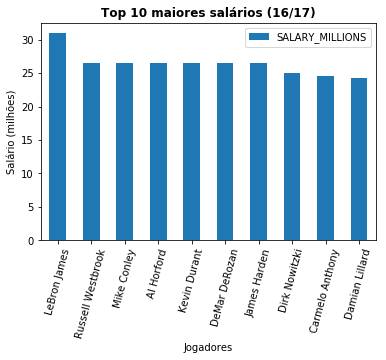

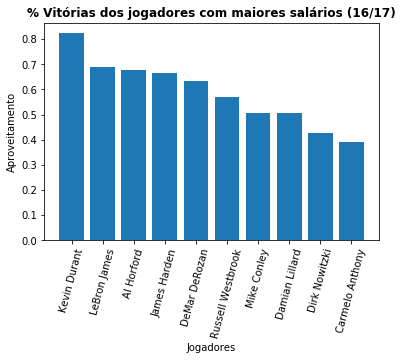

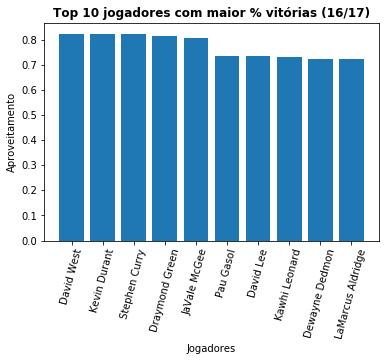

In [29]:
# GRÁFICO 1 (top 10 jogadores mais bem pagos)
grafico_nome_remuneracao = df_remuneracao.head(10).plot(x='PLAYER_NAME', y='SALARY_MILLIONS', kind='bar')
plt.xlabel('Jogadores')
plt.ylabel('Salário (milhões)')
plt.title('Top 10 maiores salários (16/17)', fontdict = {'fontweight': 'bold', 'fontsize' : 12})
plt.xticks(rotation = 75)
plt.show()


# GRÁFICO 2 (aproveitamento (W_PCT) dos top 10 maiores salarios)  
grafico_aproveitamento_top10_salarios = plt.bar(df_vitorias_dos_melhores_remunerados_ordenado['PLAYER_NAME'], df_vitorias_dos_melhores_remunerados_ordenado['W_PCT'])
plt.title('% Vitórias dos jogadores com maiores salários (16/17)', fontdict = {'fontweight': 'bold', 'fontsize' : 12})
plt.ylabel('Aproveitamento')
plt.xlabel('Jogadores')
plt.xticks(df_vitorias_dos_melhores_remunerados_ordenado['PLAYER_NAME'], rotation = 75)
plt.show()

df_mais_vitorias_ordenado = df_mais_vitorias.head(10)


# GRÁFICO 3 (top 10 com melhor aproveitamento) 
grafico_top10_melhores_aproveitamentos = plt.bar(df_mais_vitorias_ordenado['PLAYER_NAME'], df_mais_vitorias_ordenado['W_PCT'])
plt.title('Top 10 jogadores com maior % vitórias (16/17)', fontdict = {'fontweight': 'bold', 'fontsize' : 12})
plt.ylabel('Aproveitamento')
plt.xlabel('Jogadores')
plt.xticks(df_mais_vitorias_ordenado['PLAYER_NAME'], rotation = 75)
plt.show()




[PERGUNTA] Os jogadores mais bem pagos, ganham mais jogos?

[RESPOSTA] Não. Apenas um jogador (Kevin Durant) dos top10 maiores salários está presente na lista de top10 jogadores com melhor aproveitamento. Ressalta-se que como o basquete é um esporte coletivo, os top10 jogadores com maior % de vitórias pertecem apenas a dois times diferentes GSW e SAS.

In [30]:
df_media_pontos = df_2
df_media_pontos = df_media_pontos.drop(columns = [ 'TEAM_ID',  'GP', 'W', 'L',
        'MIN', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT',
       'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT',
       'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE', 'PIE', 'FGM', 'FGA', 'FGM_PG',
       'FGA_PG', 'FG_PCT', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK', 'NET_RATING_RANK',
       'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK',
       'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'EFG_PCT_RANK',
       'TS_PCT_RANK', 'USG_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'FGM_RANK',
       'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK', 'CFID',
       'CFPARAMS', ])


df_media_pontos = df_media_pontos.sort_values(['PTS'], ascending = False).head(10)
df_media_pontos.reset_index(drop = True, inplace = True)


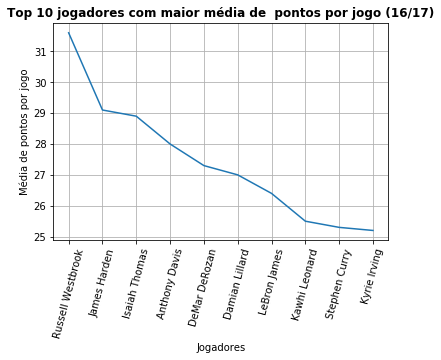

In [31]:
#top 10 com mais pontos 
grafico_top10_pontos = plt.plot(df_media_pontos['PLAYER_NAME'], df_media_pontos['PTS'])
plt.title('Top 10 jogadores com maior média de  pontos por jogo (16/17)', fontdict = {'fontweight': 'bold', 'fontsize' : 12})
plt.ylabel('Média de pontos por jogo')
plt.xlabel('Jogadores')
plt.xticks(df_media_pontos['PLAYER_NAME'], rotation = 75)
plt.grid()
plt.show()


[PERGUNTA] Os jogadores mais bem pagos, ganham mais jogos?

[RESPOSTA] Diferentemente do % de vitórias, 5 jogadores (Westbrook, HArden, DeRozan, Lillard, Lebron) que mais pontuam estão na lista dos
jogadores melhor remunerados. Os jogadores melhor remunerados não necessariamente estão nos times com melhor campanha, porém esses contribuem com muitos pontos nos jogos. Ou seja, tem um desempenho individual muito grande, o qual também contribui para 
o desempenho coletivo.

In [32]:
df_2;

### ---------------------------------------------------------------------------------------------------------------------------------------------

### [PERGUNTA 3] A idade dos jogadores influenciam nos resultados? Times com média de idade maior tem resultados melhores ou piores que times com menor média de idade menor.

In [33]:
# Determinar a media dos valores de cada time. Comparar valor do W_PCT dos times com menor media de idade  e maior media de idade.
df_times = df_2.groupby(['TEAM_ABBREVIATION']).mean()

idade_maxima = df_times['AGE'].max() #Determinar valor máximo da idade
idade_minima = df_times['AGE'].min() #Determinar valor mínimo da idade

menor = df_times.loc[df_times['AGE'] == idade_minima]
maior = df_times.loc[df_times['AGE'] == idade_maxima]


dois =pd.concat([menor,maior]) # Juntar os dois DataFrames



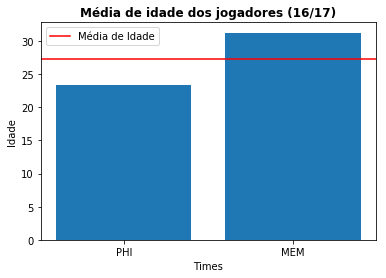

In [34]:
#Gráfico Idade

times = ['PHI','MEM']
plt.bar(times, dois['AGE'])
plt.title('Média de idade dos jogadores (16/17)', fontdict = {'fontweight': 'bold', 'fontsize' : 12})
plt.xlabel('Times')
plt.ylabel('Idade')
plt.axhline(df_times['AGE'].mean(), color='r', linestyle='-')
plt.legend(['Média de Idade'])
plt.show()

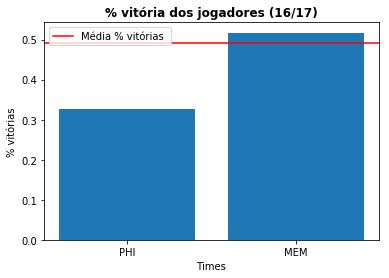

In [35]:
#Gráfico % (W_PCT) vitórias 

times = ['PHI','MEM']
plt.bar(times, dois['W_PCT'])
plt.title('% vitória dos jogadores (16/17)', fontdict = {'fontweight': 'bold', 'fontsize' : 12})
plt.xlabel('Times')
plt.ylabel('% vitórias')
plt.axhline(df_times['W_PCT'].mean(), color='r', linestyle='-')
plt.legend(['Média % vitórias '])
plt.show()

[PERGUNTA] A idade dos jogadores influenciam nos resultados? Times com media de idade maior tem resultados melhores ou piores que times com menor média de idade menor.

[RESPOSTA] A partir dos gráficos acima pode-se ter uma primeira resposta da pergunta dessa seção. Os gráficos acima comparam o times  com a maior e a  menor média de idade de elenco da NBA, ou seja, o time mais velho e o time mais novo da liga (MEM e PHI) respectivamente. A partir dos resultados desses dois times, percebe-se que o MEM (time mais velho) é mais vitorioso que o PHI (time mais novo). Inclusive  o MEM tendo mais vitórias que a média da liga, e o PHI tendo % de vitórias muito pior que a média da liga. A partir disso, pode-se chegar a algumas hipóteses, a possível piora de rendimento devido a condição física de  um time mais velho é menos impactante do que a inexperiência de jogadores muito novos. Ou seja, pode-se falar que times muito novos tem rendimento pior. Contudo essas são apenas hipóteses, para verificar se elas são verdadeiras deve-se fazer uma análise para todos os times da liga.

In [82]:
df_times_idade['VERIFICADOR'] = 0 #Criando contador para futuras analises 
df_times_vitorias['VERIFICADOR'] = 0 #Criando contador para futuras analises 


df_times_idade.loc[df_times_idade['AGE'] > df_times_idade['AGE'].mean(), 'VERIFICADOR'] = 1   #Se for maior do que a media, 1 (1 = verdadeiro)
df_times_idade

df_times_vitorias.loc[df_times_vitorias['W_PCT'] > df_times_vitorias['W_PCT'].mean(), 'VERIFICADOR'] = 1   #Se for maior do que a media, 1 (1 = verdadeiro)
df_times_vitorias;


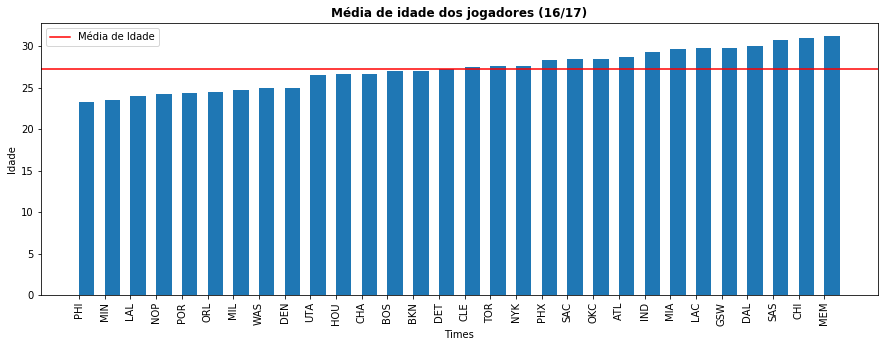

In [72]:
#Agora para validar os resultados obtidos com os times com maior e menor média de idade, farei a mesma análise 
# considerando todos os times do dataframe 
df_times_idade = df_times.sort_values(['AGE']) #Criando novo dataframe com os times ordenados em ordem crescente d


#Todos os times 

# GRÁFICO (Média de idade dos jogadores (16/17))
plt.figure(figsize=(15, 5))  # width:20, height:3  Ajustando tamanho do gráfico
plt.bar(df_times_idade.index, df_times_idade['AGE'], align='edge', width=0.6)
plt.title('Média de idade dos jogadores (16/17)', fontdict = {'fontweight': 'bold', 'fontsize' : 12})
plt.xlabel('Times')
plt.ylabel('Idade')
plt.xticks(rotation = 'vertical')
plt.axhline(df_times_idade['AGE'].mean(), color='r', linestyle='-')  # Definindo a linha vermelha de valor constante = média de idade da liga
plt.legend(['Média de Idade'])
plt.show()


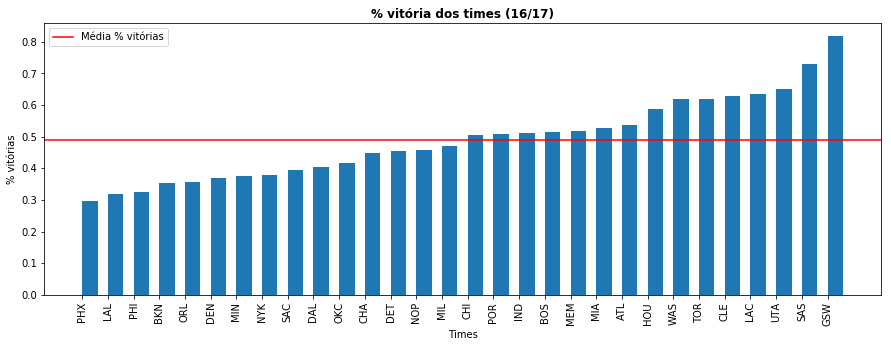

In [38]:
#Agora para validar os resultados, farei a mesma analise considerando todos os times
df_times_vitorias = df_times.sort_values(['W_PCT']) #Criando novo dataframe com os times ordenados em ordem crescente d


#Todos os times 

# GRÁFICO (% vitória dos times (16/17))
plt.figure(figsize=(15, 5))  # width:20, height:3
plt.bar(df_times_vitorias.index, df_times_vitorias['W_PCT'], align='edge', width=0.6)
plt.title('% vitória dos times (16/17)', fontdict = {'fontweight': 'bold', 'fontsize' : 12})
plt.xlabel('Times')
plt.ylabel('% vitórias')
plt.xticks(rotation = 'vertical')
plt.axhline(df_times_vitorias['W_PCT'].mean(), color='r', linestyle='-')
plt.legend(['Média % vitórias'])
plt.show()

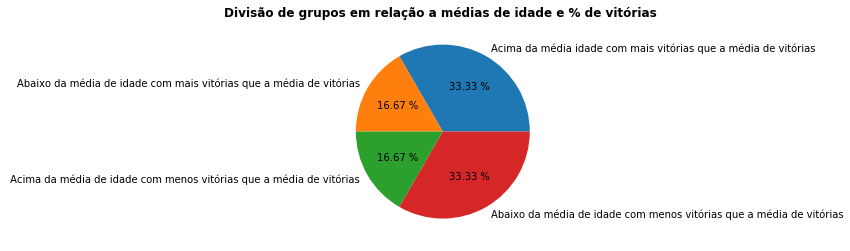

In [39]:
# Comparando os times com maior média de idade e com mais vitórias
mais_velho_mais_vitorias = df_times.loc[(df_times['W_PCT'] > df_times['W_PCT'].mean()) &
                                          (df_times['AGE'] > df_times['AGE'].mean())].count()[0]


# Comparando os times com menor média de idade e com mais vitórias
mais_novo_mais_vitorias = df_times.loc[(df_times['W_PCT'] > df_times['W_PCT'].mean()) &
                                          (df_times['AGE'] < df_times['AGE'].mean())].count()[0]



mais_velho_menos_vitorias = df_times.loc[(df_times['W_PCT'] < df_times['W_PCT'].mean()) &
                                          (df_times['AGE'] > df_times['AGE'].mean())].count()[0]



menos_velho_menos_vitorias = df_times.loc[(df_times['W_PCT'] < df_times['W_PCT'].mean()) &
                                          (df_times['AGE'] < df_times['AGE'].mean())].count()[0]


# GRÁFICO (Divisão de grupos em relação a médias de idade e % de vitórias)
plt.pie([mais_velho_mais_vitorias, mais_novo_mais_vitorias, mais_velho_menos_vitorias, menos_velho_menos_vitorias], 
        labels = ['Acima da média idade com mais vitórias que a média de vitórias',
                  'Abaixo da média de idade com mais vitórias que a média de vitórias',
                 ' Acima da média de idade com menos vitórias que a média de vitórias',
                 'Abaixo da média de idade com menos vitórias que a média de vitórias'], autopct = '%.2f %%')

plt.title('Divisão de grupos em relação a médias de idade e % de vitórias ', fontdict = {'fontweight': 'bold', 'fontsize' : 12})

plt.show()


[PERGUNTA] A idade dos jogadores influenciam nos resultados? Times com media de idade maior tem resultados melhores ou piores que times com menor média de idade menor.

[RESPOSTA]A partir do do gráfico acima percebe-se que  os times com maior media de idade (mais velhos) sao mais vitoriosos que os times 
com menor media de idade (mais novos), o que comprova nossa hipótese inicial. Jogadores mais velhos são mais experientes e essa 
experiência faz com que esses times tenham mais vitórias.

### ---------------------------------------------------------------------------------------------------------------------

### [PERGUNTA 4] Qual o perfil dos jogadores com maior percentual de Field Goals (FG). A altura dos jogadores influencia no aproveitamento dos field goals?

In [40]:
# No basquete o FG consiste na cesta de qualquer dois ou três pontos, seja chute normal ou bandeja ou enterrada.
# Lance livre não vale como FG. O lance livre entra na classe de Free Throw (FT). Nesse dataframe não há informações 
# sobre FT.

# Qual e o perfil dos jogadores com maior % de field goals 

In [41]:
# Criando novo dataframe com foco no Field Goals %
df_fg = df_2.sort_values(['FG_PCT'], ascending = False)

df_fg = df_fg.drop(columns = ['TEAM_ID', 'GP', 'W', 'L',
       'W_PCT', 'MIN', 'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'AST_PCT',
       'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT',
       'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE', 'PIE','FGM_PG',
       'FGA_PG','GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
       'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK', 'NET_RATING_RANK',
       'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK',
       'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'EFG_PCT_RANK',
       'TS_PCT_RANK', 'USG_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'FGM_RANK',
       'FGA_RANK', 'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK', 'CFID',
       'CFPARAMS', 'SALARY_MILLIONS', 'PTS'])  # Retirar colunas que nao serao utilizadas na analise 

# O passo a seguir esta sendo realizado como uma forma de filtrar apenas jogadores que tiveram um determinado numero
# de tentativas de chute. Como o indicador de Field Goals % (FG_PCT) consiste na divis'ao entre FGM/FGA (chutes certos/tentativas de chutes)
# os jogadores que possuem poucas tentativas de chute, seja por ter jogado poucos jogos ou algum outro motivo, tem o indicador
# muito impactado. Para tentar solucionar esse problema, fiz um novo dataframe considerando apenas os valores
# em que as tentativas tenham sido maior que 50% da media de tentativas dos jogadores da liga. 
df_fg = df_fg.loc[df_fg['FGA'] > df_fg['FGA'].mean()*0.5]
    
df_fg = df_fg.reset_index(drop = True) # Resetando o indice do dataframe 
 
# Criar novo dataframe o qual adicionaremos colunas com altura e posicao dos jogadores.
# Como esse dado nao esta presente no dataframe, irei coletar esses dados individualmente para cada jogador utilizando
# outras plataformas. Utilizar-se-a apenas 20 jogadores para simplificar a coleta desses dados 
df_fg = df_fg.head(20) 




# Dicionario com nome dos 20 jogadores com maior FG_PCT com suas respectivas alturas, peso,posicao
# As informacoes foram coletadas do site ESPN Brasil.
dicionario_alturas_posicao = {'DeAndre Jordan' : [2.11, 120, 'pivo'],
                              'Rudy Gobert' : [2.16, 117, 'pivo'],
                              'Clint Capela' : [2.08, 108, 'pivo'],
                              'Dwight Howard' : [2.11, 120, 'pivo'],
                              'David Lee' : [2.06, 111, 'pivo'],
                              'Nikola Jokic' : [2.13, 128, 'pivo'],
                              'Richaun Holmes' : [2.08, 106, 'pivo'],
                              'Hassan Whiteside' : [2.13, 120, 'pivo'],
                              'Jonas Valanciunas' : [2.11, 120, 'pivo'],
                              'Kenneth Faried' : [2.03, 99, 'ala-pivo'],
                              'LeBron James' : [2.06, 113, 'ala'],
                              'Enes Kanter' : [2.11, 113, 'pivo'],
                              'Karl-Anthony Towns' : [2.11, 112, 'pivo'],
                              'Kevin Durant' : [2.08, 108, 'ala'],
                              'Greg Monroe' : [2.11, 120, 'pivo'],
                              'Michael Beasley' : [2.08, 107, 'ala-pivo'],
                              'Andre Drummond' : [2.11, 126, 'pivo'],
                              'Willy Hernangomez' : [2.11, 113, 'pivo'],
                              'Giannis Antetokounmpo' : [2.11, 109, 'ala-pivo'],
                              "Kyle O'Quinn" : [2.06, 113, 'pivo']}


nome_colunas = ['ALTURA', 'PESO', 'POSICOES']

df_fg_alt_pos = pd.DataFrame(dicionario_alturas_posicao) # Criar dataframe com informacoes do dicionario dicionario_alturas_posicao
df_fg_alt_pos = df_fg_alt_pos.transpose() # Transpor a matriz criada, haja vista que o nome dos indicadores estavam nas colunas e nao nas linhas

df_fg_alt_pos.columns = ['ALTURA', 'PESO', 'POSICOES'] # Adicionando cabecalhos (headers)
df_fg_alt_pos

df_fg_alt_pos['FG_PCT'] = df_fg['FG_PCT'].values # Adicionando uma coluna de dataframe em outro dataframe

df_fg_alt_pos

,ALTURA,PESO,POSICOES,FG_PCT
DeAndre Jordan,2.11,120,pivo,0.714
Rudy Gobert,2.16,117,pivo,0.661
Clint Capela,2.08,108,pivo,0.643
Dwight Howard,2.11,120,pivo,0.633
David Lee,2.06,111,pivo,0.590
Nikola Jokic,2.13,128,pivo,0.578
Richaun Holmes,2.08,106,pivo,0.558
Hassan Whiteside,2.13,120,pivo,0.557
Jonas Valanciunas,2.11,120,pivo,0.557
Kenneth Faried,2.03,99,ala-pivo,0.548


In [77]:
posicoes = df_fg_alt_pos.groupby(['POSICOES']).count()['FG_PCT'] # contar número de jogadores por posição
posicoes

POSICOES
ala          2
ala-pivo     3
pivo        15
Name: FG_PCT, dtype: int64

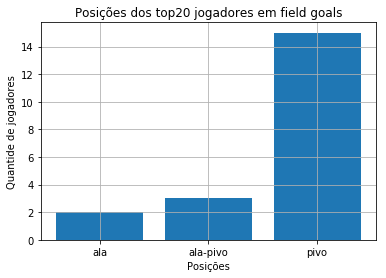

In [75]:
plt.bar(posicoes.index, posicoes)
plt.title('Posições dos top20 jogadores em field goals')
plt.xlabel('Posições')
plt.ylabel('Quantide de jogadores')
plt.grid()
plt.show()



[PERGUNTA]  Qual o perfil dos jogadores com maior percentual de Field Goals (FG). A altura dos jogadores influencia no aproveitamento dos field goals?

[RESPOSTA] Jogadores com maior aproveitamento de field goals, dentro da amostra selecionada, são de posições predominantemente  pivo e ala pivo. Todos os 20 jogadores analisados possuem altura maior que 2,00m. Ou seja, jogadores que jogam próximo a cesta e são altos. Esse resultado pode ser justificado pela definição do que entra em field goals:  o FG consiste na cesta de qualquer dois ou três pontos, seja chute normal ou bandeja ou enterrada. Portanto, como jogadores mais altos jogam mais próximos da cesta, isso favorece um maior número de acertos nos chutes, além de que jogadores maiores tem maior facilidade em realizar bandejas e enterradas, o que minimiza o número de erros ao tentar a cesta.

In [69]:
posicoes

POSICOES
ala          2
ala-pivo     3
pivo        15
Name: FG_PCT, dtype: int64